In [49]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pandas.read_csv("/home/leeladhar/Downloads/Churn_Modelling.csv")
df.shape

(10000, 14)

In [51]:

df.drop(['CustomerId',"Surname","RowNumber"],axis=1,inplace=True)

In [52]:
df.shape

(10000, 11)

In [53]:
df.isnull().sum()


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [54]:
df.duplicated().sum()

0

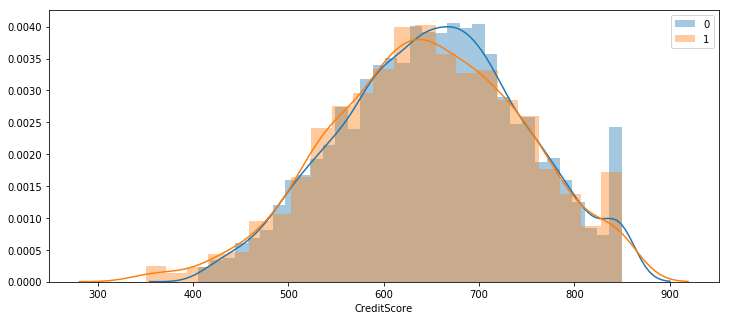

In [55]:
plt.figure(figsize=(12,5))
sns.distplot(df["CreditScore"][df["Exited"]==0])
sns.distplot(df["CreditScore"][df["Exited"]==1])
plt.legend(['0','1'])

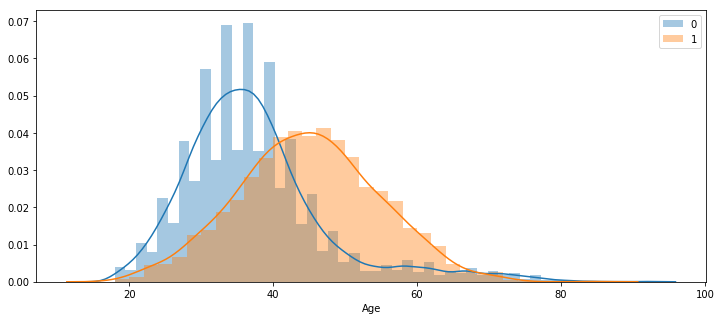

In [20]:
plt.figure(figsize=(12,5))
sns.distplot(df["Age"][df["Exited"]==0])
sns.distplot(df["Age"][df["Exited"]==1])
plt.legend(['0','1'])
plt.show()


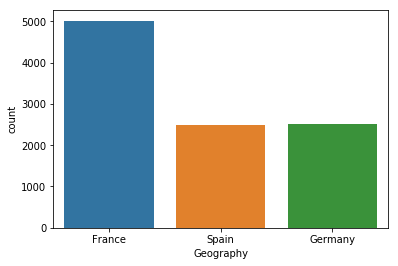

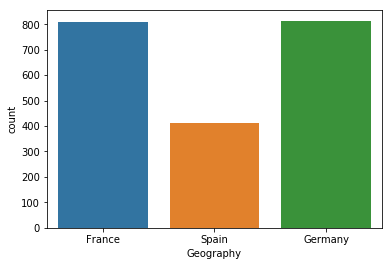

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(df['Geography'])
plt.show()
plt.figure(figsize=(6,4))
sns.countplot(df['Geography'][df['Exited']==1])
plt.show()


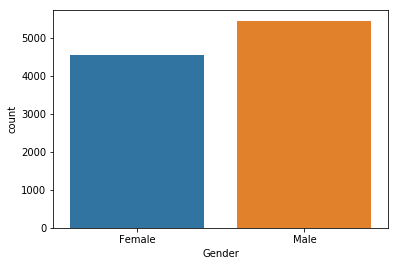

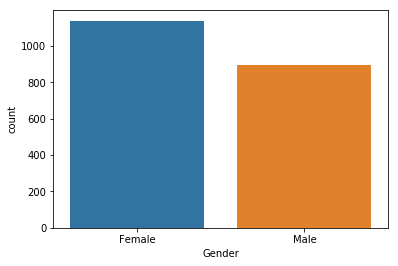

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(df['Gender'])
plt.show()
plt.figure(figsize=(6,4))
sns.countplot(df['Gender'][df['Exited']==1])
plt.show()


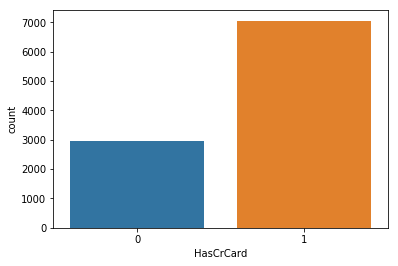

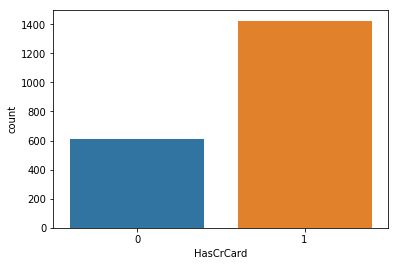

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(df['HasCrCard'])
plt.show()
plt.figure(figsize=(6,4))
sns.countplot(df['HasCrCard'][df['Exited']==1])
plt.show()


In [24]:
cor = df.corr()

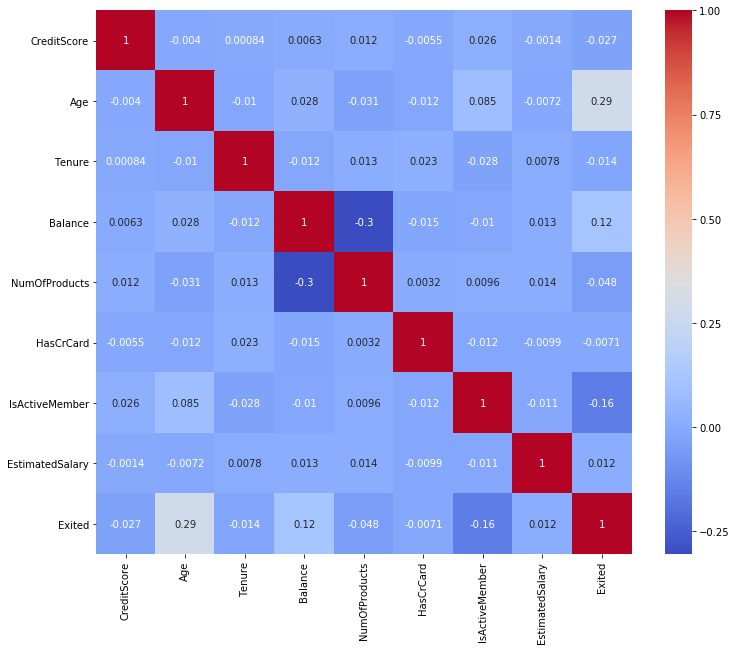

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,cmap="coolwarm")
plt.show()


In [26]:
df = df[["Age","Geography","Gender","Balance",
        "IsActiveMember","Exited"]]


In [27]:
x = df.drop(["Exited"],axis=1)
y = df["Exited"]

In [28]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
x["Geography"] = le1.fit_transform(x["Geography"])

le2 = LabelEncoder()
x["Gender"] = le2.fit_transform(x["Gender"])

In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[1])
x = ohe.fit_transform(x).toarray()


/home/leeladhar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/leeladhar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)


In [33]:
Twitter Accountfrom sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [34]:
model.fit(xtrain,ytrain)


/home/leeladhar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
ip = [[1,0,0,45,0,456212,1,1]]
model.predict(ip)

array([0])

In [38]:
ypred = model.predict(xtest)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.796

In [41]:
from sklearn.neural_network import MLPClassifier


In [42]:

model = MLPClassifier()


In [43]:
model.fit(xtrain,ytrain)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [44]:
ypred = model.predict(xtest)

In [46]:
from sklearn.metrics import recall_score
recall_score(ytest,ypred)


0.8014705882352942